### RMSE — Root Mean Squared Error
### MAE — Mean Absolute Error
### MAPE — Mean Absolute Percentage Error





## Model 1 : LSTM

/Users/yyq/myenv_clean/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0447 - val_loss: 0.0167
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0140 - val_loss: 0.0169
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0134 - val_loss: 0.0169
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0142 - val_loss: 0.0169
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0130 - val_loss: 0.0164
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0135 - val_loss: 0.0177
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0136 - val_loss: 0.0174
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0135 - val_loss: 0.0181
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0134 - val_loss: 0.0163
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0137 - val_loss: 0.0163
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


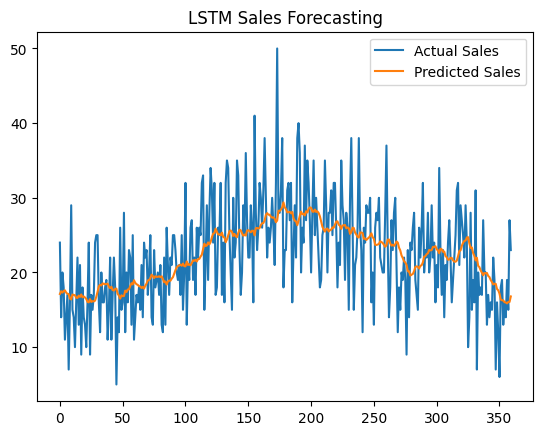

LSTM - RMSE: 6.36, MAE: 4.99, MAPE: 23.64%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

df = pd.read_csv('../dataset/retail_sales.csv', parse_dates=['date'])
df = df[df['store'] == 1]
df = df[df['item'] == 1]
df = df.sort_values('date')

sales_data = df['sales'].values.reshape(-1, 1)

scaler = MinMaxScaler()
sales_scaled = scaler.fit_transform(sales_data)

def create_sequences(data, window=30):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i + window])
        y.append(data[i + window])
    return np.array(X), np.array(y)

X, y = create_sequences(sales_scaled)


split_idx = int(len(X) * 0.8)
X_train, y_train = X[:split_idx], y[:split_idx]
X_val, y_val = X[split_idx:], y[split_idx:]


model = Sequential([
    LSTM(64, input_shape=(X.shape[1], 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

pred_scaled = model.predict(X_val)
pred = scaler.inverse_transform(pred_scaled)
true = scaler.inverse_transform(y_val)

plt.plot(true, label='Actual Sales')
plt.plot(pred, label='Predicted Sales')
plt.title('LSTM Sales Forecasting')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f'LSTM - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%')

## Model 2: GRU

Epoch 1/10


/Users/yyq/myenv_clean/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0785 - val_loss: 0.0222
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0155 - val_loss: 0.0190
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0146 - val_loss: 0.0191
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0148 - val_loss: 0.0173
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0126 - val_loss: 0.0168
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0139 - val_loss: 0.0167
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0124 - val_loss: 0.0185
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0139 - val_loss: 0.0170
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0140 - val_loss: 0.0166
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0140 - val_loss: 0.0181
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


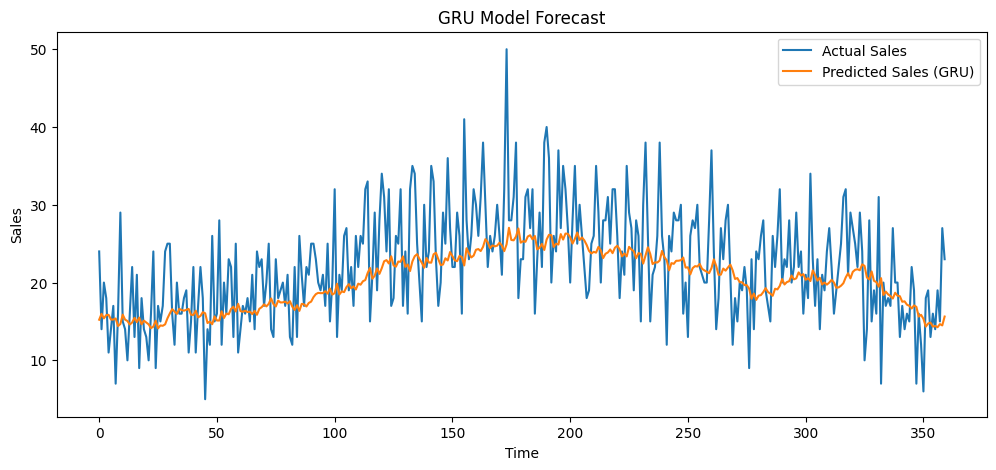

GRU - RMSE: 6.18, MAE: 4.84, MAPE: 23.35%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import matplotlib.pyplot as plt

df = pd.read_csv('../dataset/retail_sales.csv', parse_dates=['date'])
df = df[(df['store'] == 1) & (df['item'] == 1)]
df = df.sort_values('date')

sales_data = df['sales'].values.reshape(-1, 1)
scaler = MinMaxScaler()
sales_scaled = scaler.fit_transform(sales_data)

def create_sequences(data, window=30):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

X, y = create_sequences(sales_scaled, window=30)


split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_val, y_val = X[split:], y[split:]

model = Sequential([
    GRU(64, input_shape=(X.shape[1], 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

y_pred_scaled = model.predict(X_val)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_val)

plt.figure(figsize=(12, 5))
plt.plot(y_true, label='Actual Sales')
plt.plot(y_pred, label='Predicted Sales (GRU)')
plt.title('GRU Model Forecast')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()


from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f'GRU - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%')


## Model 3: Transformer

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.3144 - val_loss: 0.0215
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0173 - val_loss: 0.0171
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0151 - val_loss: 0.0179
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0142 - val_loss: 0.0173
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0146 - val_loss: 0.0168
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0150 - val_loss: 0.0164
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0151 - val_loss: 0.0164
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0141 - val_loss: 0.0182
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0140 - val_loss: 0.0186
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0154 - val_loss: 0.0191
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


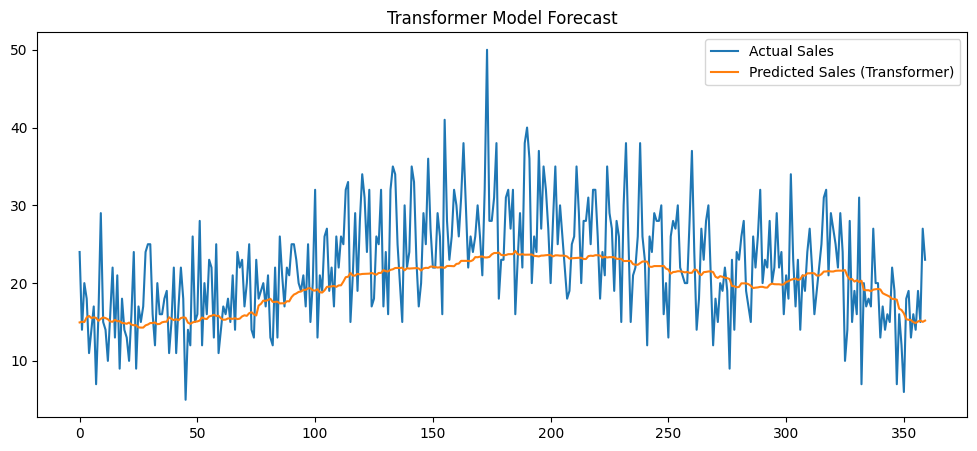

Transformer - RMSE: 6.36, MAE: 4.99, MAPE: 23.64%


In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error


df = pd.read_csv('../dataset/retail_sales.csv', parse_dates=['date'])
df = df[(df['store'] == 1) & (df['item'] == 1)]
df = df.sort_values('date')

sales_data = df['sales'].values.reshape(-1, 1)
scaler = MinMaxScaler()
sales_scaled = scaler.fit_transform(sales_data)


def create_sequences(data, window=30):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

X, y = create_sequences(sales_scaled, window=30)
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_val, y_val = X[split:], y[split:]

class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            layers.Dense(ff_dim, activation="relu"),
            layers.Dense(embed_dim),
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training= None):
        attn_output = self.att(inputs, inputs)
        out1 = self.layernorm1(inputs + self.dropout1(attn_output, training=training))
        ffn_output = self.ffn(out1)
        return self.layernorm2(out1 + self.dropout2(ffn_output, training=training))

embed_dim = 32
num_heads = 2
ff_dim = 64

inputs = layers.Input(shape=(X.shape[1], 1))
x = layers.Dense(embed_dim)(inputs)
x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(20, activation="relu")(x)
outputs = layers.Dense(1)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer="adam", loss="mse")

model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

y_pred_scaled = model.predict(X_val)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_val)

plt.figure(figsize=(12, 5))
plt.plot(y_true, label='Actual Sales')
plt.plot(y_pred, label='Predicted Sales (Transformer)')
plt.title('Transformer Model Forecast')
plt.legend()
plt.show()

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f'Transformer - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%')


## Model 4: TCN


Epoch 1/10


/Users/yyq/myenv_clean/lib/python3.12/site-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 7.2624 - val_loss: 0.0632
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0367 - val_loss: 0.0281
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0196 - val_loss: 0.0244
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 0.0172 - val_loss: 0.0209
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0141 - val_loss: 0.0189
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0138 - val_loss: 0.0177
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0112 - val_loss: 0.0178
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - loss: 0.0121 - val_loss: 0.0169
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0103 - val_loss: 0.0171
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0116 - val_loss: 0.0173
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


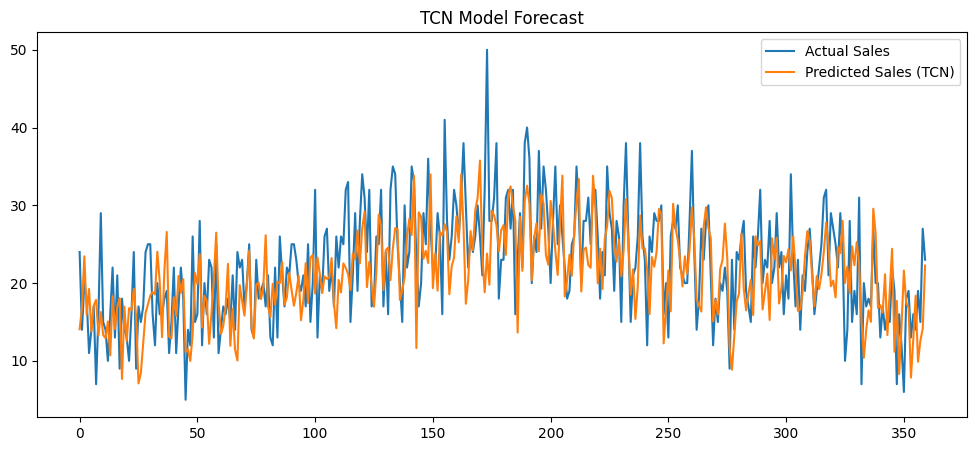

TCN - RMSE: 6.06, MAE: 4.84, MAPE: 24.25%


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense
from tcn import TCN

df = pd.read_csv('../dataset/retail_sales.csv', parse_dates=['date'])
df = df[(df['store'] == 1) & (df['item'] == 1)]
df = df.sort_values('date')

sales_data = df['sales'].values.reshape(-1, 1)
scaler = MinMaxScaler()
sales_scaled = scaler.fit_transform(sales_data)

def create_sequences(data, window=30):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

X, y = create_sequences(sales_scaled)
split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_val, y_val = X[split:], y[split:]

model = Sequential()
model.add(TCN(input_shape=(X.shape[1], 1)))  # 1 表示 univariate
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


y_pred_scaled = model.predict(X_val)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_val)

plt.figure(figsize=(12, 5))
plt.plot(y_true, label='Actual Sales')
plt.plot(y_pred, label='Predicted Sales (TCN)')
plt.title('TCN Model Forecast')
plt.legend()
plt.show()

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f'TCN - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%')


## Model 5: N-BEATS

| N-Beats
| --  Stack Trend (#0) (share_weights_in_stack=False)
     | -- TrendBlock(units=128, thetas_dim=4, backcast_length=30, forecast_length=1, share_thetas=True) at @11406240384
     | -- TrendBlock(units=128, thetas_dim=4, backcast_length=30, forecast_length=1, share_thetas=True) at @11409716864
| --  Stack Seasonality (#1) (share_weights_in_stack=False)
     | -- SeasonalityBlock(units=128, thetas_dim=1, backcast_length=30, forecast_length=1, share_thetas=True) at @11407880704
     | -- SeasonalityBlock(units=128, thetas_dim=1, backcast_length=30, forecast_length=1, share_thetas=True) at @11416250768


/Users/yyq/myenv_clean/lib/python3.12/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([64, 1, 1])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/yyq/myenv_clean/lib/python3.12/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([22, 1, 1])) that is different to the input size (torch.Size([22, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1, Loss: 0.0368
Epoch 2, Loss: 0.0207
Epoch 3, Loss: 0.0204
Epoch 4, Loss: 0.0201
Epoch 5, Loss: 0.0199
Epoch 6, Loss: 0.0200
Epoch 7, Loss: 0.0201
Epoch 8, Loss: 0.0201
Epoch 9, Loss: 0.0207
Epoch 10, Loss: 0.0202


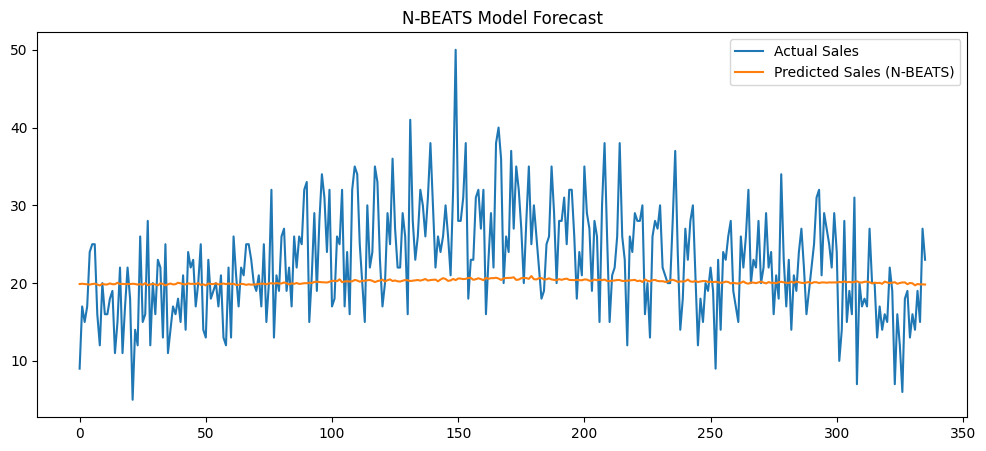

N-BEATS - RMSE: 7.19, MAE: 5.68, MAPE: 26.70%


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from nbeats_pytorch.model import NBeatsNet

df = pd.read_csv('../dataset/retail_sales.csv', parse_dates=['date'])
df = df[(df['store'] == 1) & (df['item'] == 1)].sort_values('date')

sales_data = df['sales'].values.reshape(-1, 1)
scaler = MinMaxScaler()
sales_scaled = scaler.fit_transform(sales_data)

WINDOW = 30
HORIZON = 1

class TimeSeriesDataset(Dataset):
    def __init__(self, data, window, horizon):
        self.X, self.y = [], []
        for i in range(len(data) - window - horizon + 1):
            self.X.append(data[i:i+window])
            self.y.append(data[i+window:i+window+horizon])
        self.X = np.array(self.X)
        self.y = np.array(self.y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return torch.tensor(self.X[idx], dtype=torch.float32), torch.tensor(self.y[idx], dtype=torch.float32)

split = int(len(sales_scaled) * 0.8)
train_dataset = TimeSeriesDataset(sales_scaled[:split], WINDOW, HORIZON)
val_dataset = TimeSeriesDataset(sales_scaled[split:], WINDOW, HORIZON)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = NBeatsNet(
    stack_types=('trend', 'seasonality'),
    nb_blocks_per_stack=2,
    forecast_length=HORIZON,
    backcast_length=WINDOW,
    thetas_dim=(4, 8),
    hidden_layer_units=128
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()


EPOCHS = 10
for epoch in range(EPOCHS):
    model.train()
    train_losses = []
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        backcast, forecast = model(X_batch)
        loss = loss_fn(forecast, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
    print(f"Epoch {epoch+1}, Loss: {np.mean(train_losses):.4f}")


model.eval()
predictions, actuals = [], []

with torch.no_grad():
    for X_batch, y_batch in val_loader:
        X_batch = X_batch.to(device)
        _, forecast = model(X_batch)
        predictions.extend(forecast.cpu().numpy())
        actuals.extend(y_batch.numpy())

y_pred = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
y_true = scaler.inverse_transform(np.array(actuals).reshape(-1, 1))


plt.figure(figsize=(12, 5))
plt.plot(y_true, label='Actual Sales')
plt.plot(y_pred, label='Predicted Sales (N-BEATS)')
plt.title('N-BEATS Model Forecast')
plt.legend()
plt.show()


rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f'N-BEATS - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%')


## Model 6: ARIMA

/Users/yyq/myenv_clean/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/yyq/myenv_clean/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


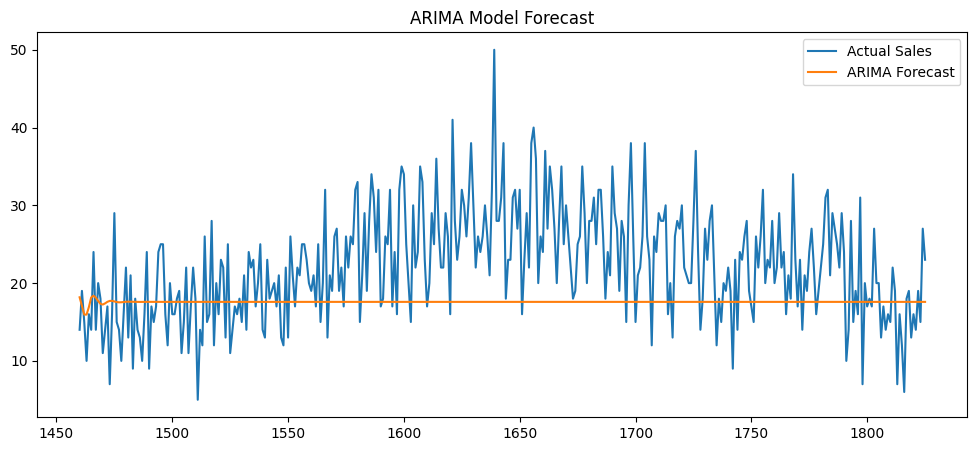

ARIMA - RMSE: 8.31, MAE: 6.56, MAPE: 29.03%


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

df = pd.read_csv('../dataset/retail_sales.csv', parse_dates=['date'])
df = df[(df['store'] == 1) & (df['item'] == 1)].sort_values('date')

train_size = int(len(df) * 0.8)
train, test = df['sales'][:train_size], df['sales'][train_size:]

model = ARIMA(train, order=(5, 1, 2)) 
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test))


plt.figure(figsize=(12, 5))
plt.plot(test.index, test.values, label='Actual Sales')
plt.plot(test.index, forecast.values, label='ARIMA Forecast')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()


rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
mape = np.mean(np.abs((test.values - forecast.values) / test.values)) * 100

print(f'ARIMA - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%')


## Model 7: SARIMA

/Users/yyq/myenv_clean/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/yyq/myenv_clean/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


SARIMA - RMSE: 7.31, MAE: 5.81, MAPE: 26.14%


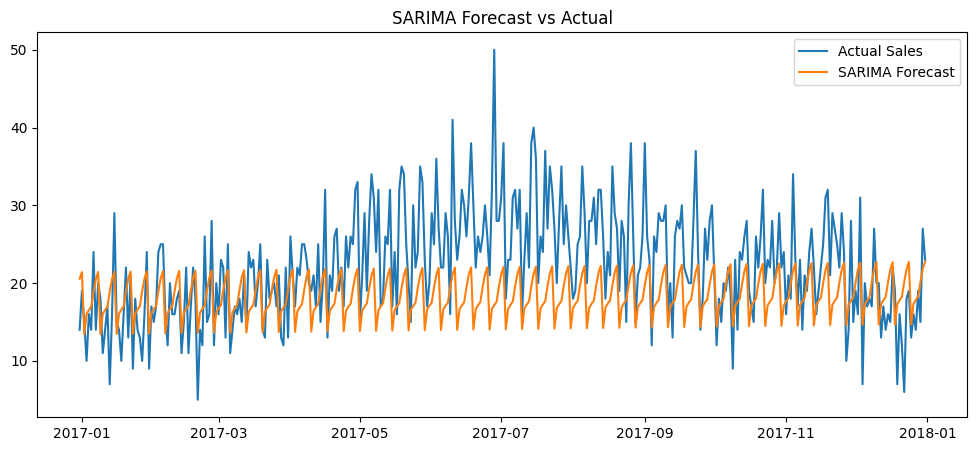

SARIMA - RMSE: 7.31, MAE: 5.81, MAPE: 26.14%


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load and prepare the data
df = pd.read_csv('../dataset/retail_sales.csv', parse_dates=['date'])
df = df[(df['store'] == 1) & (df['item'] == 1)].sort_values('date')

# Use daily frequency; index must be datetime
df.set_index('date', inplace=True)

# Split into train/test
train_size = int(len(df) * 0.8)
train, test = df['sales'][:train_size], df['sales'][train_size:]

# Fit SARIMA model
# SARIMA(p,d,q)(P,D,Q,s), where s is the seasonal cycle (e.g., 7 for weekly)
model = SARIMAX(train, 
                order=(1, 1, 1), 
                seasonal_order=(1, 1, 1, 7),  # Weekly seasonality
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit(disp=False)

# Forecast
forecast = results.forecast(steps=len(test))

# Evaluate
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
mape = np.mean(np.abs((test - forecast) / test)) * 100

print(f'SARIMA - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%')

# Plot
plt.figure(figsize=(12, 5))
plt.plot(test.index, test.values, label='Actual Sales')
plt.plot(test.index, forecast.values, label='SARIMA Forecast')
plt.title('SARIMA Forecast vs Actual')
plt.legend()
plt.show()




print(f'SARIMA - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%')


## Model 8: Prophet

/Users/yyq/myenv_clean/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
19:10:43 - cmdstanpy - INFO - Chain [1] start processing
19:10:44 - cmdstanpy - INFO - Chain [1] done processing


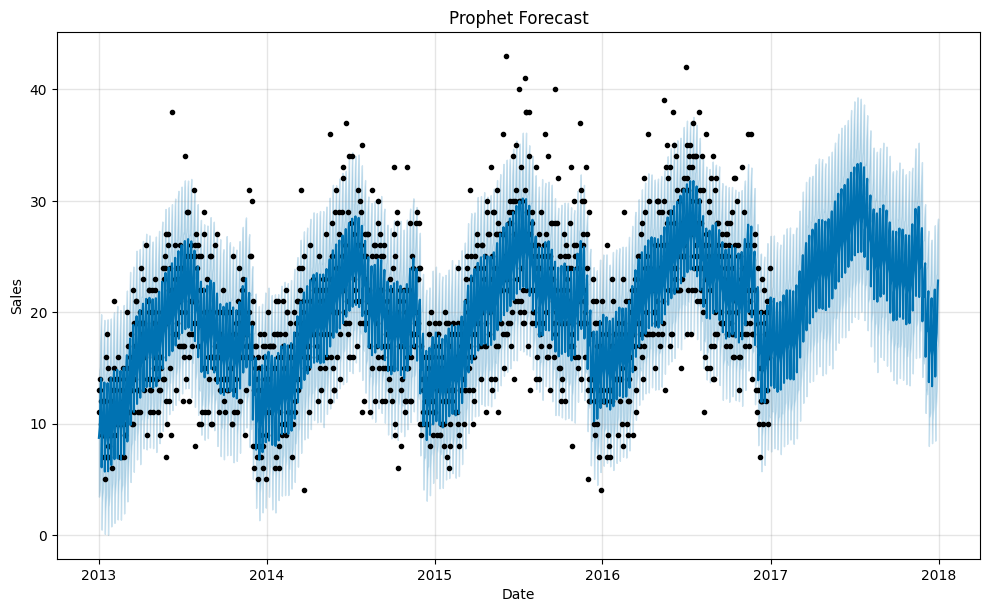

Prophet - RMSE: 5.01, MAE: 4.07, MAPE: 22.59%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

df = pd.read_csv('../dataset/retail_sales.csv', parse_dates=['date'])
df = df[(df['store'] == 1) & (df['item'] == 1)].sort_values('date')

df_prophet = df[['date', 'sales']].rename(columns={'date': 'ds', 'sales': 'y'})


train_size = int(len(df_prophet) * 0.8)
train_df = df_prophet.iloc[:train_size]
test_df = df_prophet.iloc[train_size:]

model = Prophet()
model.fit(train_df)

future = model.make_future_dataframe(periods=len(test_df))
forecast = model.predict(future)

model.plot(forecast)
plt.title('Prophet Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

pred = forecast[['ds', 'yhat']].set_index('ds').iloc[-len(test_df):]
actual = test_df.set_index('ds')

rmse = np.sqrt(mean_squared_error(actual['y'], pred['yhat']))
mae = mean_absolute_error(actual['y'], pred['yhat'])
mape = np.mean(np.abs((actual['y'] - pred['yhat']) / actual['y'])) * 100

print(f'Prophet - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%')


## Model 9: XGBoost

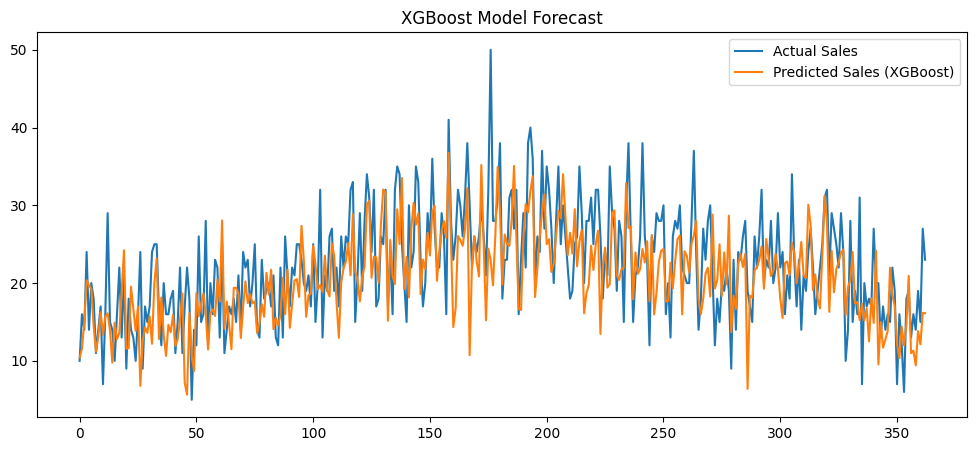

XGBoost - RMSE: 5.85, MAE: 4.63, MAPE: 22.32%


In [7]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv('../dataset/retail_sales.csv', parse_dates=['date'])
df = df[(df['store'] == 1) & (df['item'] == 1)].sort_values('date')

df['lag_1'] = df['sales'].shift(1)
df['lag_7'] = df['sales'].shift(7)
df['lag_14'] = df['sales'].shift(14)

df['dayofweek'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month

df = df.dropna()


features = ['lag_1', 'lag_7', 'lag_14', 'dayofweek', 'month']
target = 'sales'

X = df[features]
y = df[target]

train_size = int(len(X) * 0.8)
X_train, X_val = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_val = y.iloc[:train_size], y.iloc[train_size:]

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100


plt.figure(figsize=(12, 5))
plt.plot(y_val.values, label='Actual Sales')
plt.plot(y_pred, label='Predicted Sales (XGBoost)')
plt.title('XGBoost Model Forecast')
plt.legend()
plt.show()

print(f'XGBoost - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%')


### Deep Learning Model
#### Model 1
#### LSTM - RMSE: 6.18, MAE: 4.84, MAPE: 23.35%
#### Model 2
#### GRU - RMSE: 6.18, MAE: 4.84, MAPE: 23.35%
#### Model 3
#### Transformer - RMSE: 6.36, MAE: 4.99, MAPE: 23.64%
#### Model 4
#### TCN - RMSE: 6.06, MAE: 4.84, MAPE: 24.25%
#### Model 5
#### N-BEATS - RMSE: 7.19, MAE: 5.68, MAPE: 26.70%



### Classical Model
#### Model 6
#### ARIMA - RMSE: 8.31, MAE: 6.56, MAPE: 29.03%
#### Model 7
#### SARIMA - RMSE: 7.31, MAE: 5.81, MAPE: 26.14%
#### Model 8
#### Prophet - RMSE: 5.01, MAE: 4.07, MAPE: 22.59%
#### Model 9
#### XGBoost - RMSE: 5.85, MAE: 4.63, MAPE: 22.32%